In [78]:
import pandas as pd 
import numpy as np


# arquivo com informações de consorcio de imoveis e grupos de todas as administradoras de consorcio
url = "C:/Users/joth1/Documents/miniprojeto_pandas_sql/Nova pasta/202310Consorcios/202310Bens_Imoveis_Grupos.csv"

# Tente ler o arquivo usando utf-8 e, se falhar, tente latin-1
try:
    df = pd.read_csv(url, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    df = pd.read_csv(url, encoding='latin-1', sep=';')

display(df)


,#Nome_da_Administradora,CNPJ_da_Administradora,Data_base,Código_do_grupo,Código_do_segmento,Número_da_assembléia_geral_ordinária,Valor_médio_do_bem,Índice_de_correção,Taxa_de_administração,Prazo_do_grupo_em_meses,Quantidade_de_cotas_ativas_em_dia,Quantidade_de_cotas_ativas_contempladas_inadimplentes,Quantidade_de_cotas_ativas_não_contempladas_inadimplentes,Quantidade_de_cotas_ativas_contempladas_no_mês,Quantidade_de_cotas_excluídas,Quantidade_de_cotas_ativas_quitadas,Quantidade_de_cotas_ativas_com_crédito_pendente_de_utilização
0,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00040,1,180,"272255,31",3,"18,65135",180,373,73,0,0,1721,431,15
1,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00041,1,180,"288848,90",3,"17,21443",180,422,84,0,0,1869,493,10
2,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00043,1,180,"269396,83",3,"18,29910",180,381,62,0,0,1795,433,10
3,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00044,1,180,"288651,90",3,"18,35775",180,385,86,0,0,1827,456,11
4,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00045,1,180,"258187,40",3,"18,75243",180,335,77,0,0,1776,393,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,BANRISUL S.A. ADM CONSÓRCIOS ...,92692979,202310,10062,1,5,"153125,00",3,"16,98270",200,529,0,49,2,166,0,8
2126,BANRISUL S.A. ADM CONSÓRCIOS ...,92692979,202310,10063,1,3,"87582,78",3,"20,00000",200,489,0,107,1,101,0,7
2127,BANRISUL S.A. ADM CONSÓRCIOS ...,92692979,202310,10064,1,2,"84259,87",3,"20,00000",200,600,0,0,4,45,0,5
2128,BANRISUL S.A. ADM CONSÓRCIOS ...,92692979,202310,10902,1,89,"183306,93",99,"12,00000",180,345,5,0,1,258,69,66


In [87]:
df2 = df.groupby('#Nome_da_Administradora').agg(qtd_nomes=('#Nome_da_Administradora', 'size')).reset_index()

df2 = df2.sort_values(ascending=False, by='qtd_nomes')

display(df2)

,#Nome_da_Administradora,qtd_nomes
11,BRADESCO CONS. LTDA. ...,385
44,PORTO SEGURO ADM. CONS. LTDA ...,269
38,ITAÚ ADM DE CONSÓRCIOS LTDA ...,251
37,HS ADM CONS LTDA ...,111
27,EMBRACON ADM CONS LTDA ...,107
...,...,...
50,REDE OESTE ADM DE CONS LTDA ...,1
29,FINAMA ADM CONS LTDA ...,1
18,COMAUTO ADM CONS LTDA. ...,1
57,SIMPALA ADM CONSÓRCIOS LTDA. ...,1


['BRADESCO CONS. LTDA.',
 'PORTO SEGURO ADM. CONS. LTDA',
 'ITAÚ ADM DE CONSÓRCIOS LTDA',
 'HS ADM CONS LTDA',
 'EMBRACON ADM CONS LTDA']

,#Nome_da_Administradora,CNPJ_da_Administradora,Data_base,Código_do_grupo,Código_do_segmento,Número_da_assembléia_geral_ordinária,Valor_médio_do_bem,Índice_de_correção,Taxa_de_administração,Prazo_do_grupo_em_meses,Quantidade_de_cotas_ativas_em_dia,Quantidade_de_cotas_ativas_contempladas_inadimplentes,Quantidade_de_cotas_ativas_não_contempladas_inadimplentes,Quantidade_de_cotas_ativas_contempladas_no_mês,Quantidade_de_cotas_excluídas,Quantidade_de_cotas_ativas_quitadas,Quantidade_de_cotas_ativas_com_crédito_pendente_de_utilização
0,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00040,1,180,"272255,31",3,"18,65135",180,373,73,0,0,1721,431,15
1,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00041,1,180,"288848,90",3,"17,21443",180,422,84,0,0,1869,493,10
2,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00043,1,180,"269396,83",3,"18,29910",180,381,62,0,0,1795,433,10
3,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00044,1,180,"288651,90",3,"18,35775",180,385,86,0,0,1827,456,11
4,ITAÚ ADM DE CONSÓRCIOS LTDA ...,776,202310,00045,1,180,"258187,40",3,"18,75243",180,335,77,0,0,1776,393,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,HS ADM CONS LTDA ...,73516106,202310,1132,1,3,"137388,40",3,"22,00000",180,1773,0,175,5,5,0,11
1919,HS ADM CONS LTDA ...,73516106,202310,1133,1,2,"92379,76",3,"22,00000",180,1996,0,0,4,1,0,10
1920,HS ADM CONS LTDA ...,73516106,202310,1134,1,1,"294105,79",3,"22,00000",200,1587,0,0,3,1,0,3
1921,HS ADM CONS LTDA ...,73516106,202310,1135,1,1,"786539,72",3,"22,00000",220,1520,0,0,2,3,0,2


,#Nome_da_Administradora,qtd,qtd_cotas_excluidas,qtd_cotas_ativas,NPL,NPL_NAO_CONT,qtd_cotas_com_sobras,NPL_CALC,NPL_CALC_NCONT
41,MENEGALLI ADM CONS LTDA ...,1,1907,300,96,0,0,32.000000,0.000000
42,MERCABENCO ...,1,472,225,47,51,26,20.888889,22.666667
32,GAP ADM CONS LTDA. ...,10,259,1009,205,66,2,20.317146,6.541130
38,ITAÚ ADM DE CONSÓRCIOS LTDA ...,251,378242,87502,11912,16502,11951,13.613403,18.858998
36,H. CONSÓRCIO ...,1,956,108,14,0,8,12.962963,0.000000
...,...,...,...,...,...,...,...,...,...
17,COIMEX ADM CONS S.A. ...,21,11734,11870,81,1231,667,0.682393,10.370682
65,XS5 ADM CONS S.A. ...,33,17737,37457,30,4939,1143,0.080092,13.185786
12,BREITKOPF ADM CONS LTDA ...,1,238,730,0,111,11,0.000000,15.205479
18,COMAUTO ADM CONS LTDA. ...,1,81,253,0,83,2,0.000000,32.806324


,#Nome_da_Administradora,qtd,qtd_cotas_excluidas,qtd_cotas_ativas,NPL,NPL_NAO_CONT,qtd_cotas_com_sobras,NPL_CALC,NPL_CALC_NCONT
11,BRADESCO CONS. LTDA. ...,385,398972,223646,5401,15456,25847,2.414977,6.910922
44,PORTO SEGURO ADM. CONS. LTDA ...,269,133354,154120,3706,10195,14639,2.404620,6.614975
38,ITAÚ ADM DE CONSÓRCIOS LTDA ...,251,378242,87502,11912,16502,11951,13.613403,18.858998
37,HS ADM CONS LTDA ...,111,124869,126124,1960,8665,7230,1.554026,6.870223
27,EMBRACON ADM CONS LTDA ...,107,220350,72524,2788,4273,8194,3.844245,5.891843
...,...,...,...,...,...,...,...,...,...
50,REDE OESTE ADM DE CONS LTDA ...,1,712,405,5,62,16,1.234568,15.308642
29,FINAMA ADM CONS LTDA ...,1,818,263,12,1,15,4.562738,0.380228
18,COMAUTO ADM CONS LTDA. ...,1,81,253,0,83,2,0.000000,32.806324
57,SIMPALA ADM CONSÓRCIOS LTDA. ...,1,91,160,2,72,7,1.250000,45.000000


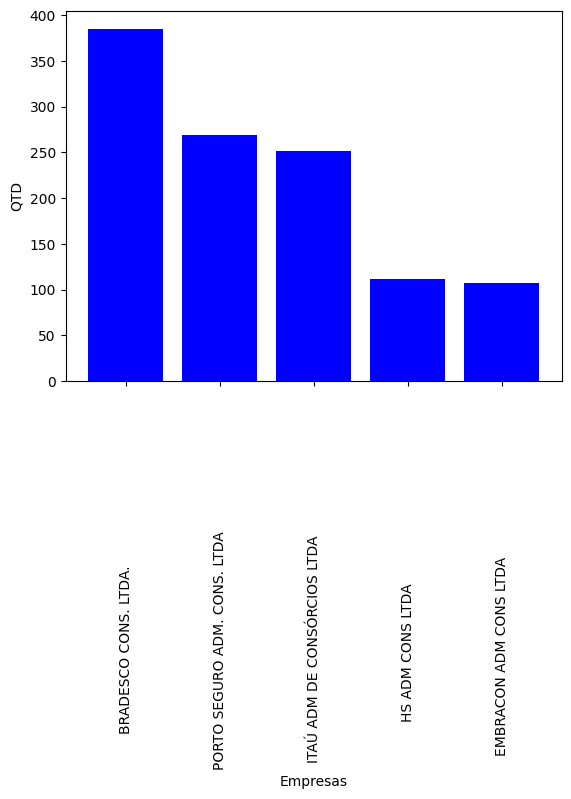

In [88]:
df3 = df.copy()

empresas = df2['#Nome_da_Administradora'].str.strip().head(5).tolist()
display(empresas)

df3 = df3[df3['#Nome_da_Administradora'].str.strip().astype(str).isin(empresas)]


display(df3)


df_ordenado_quantidade = df.groupby('#Nome_da_Administradora').agg(qtd=('#Nome_da_Administradora', 'size'),
                                                                   qtd_cotas_excluidas=('Quantidade_de_cotas_excluídas', 'sum')
                                                                   ,qtd_cotas_ativas=('Quantidade_de_cotas_ativas_em_dia', 'sum')
                                                                   ,NPL=('Quantidade_de_cotas_ativas_contempladas_inadimplentes', 'sum')
                                                                   ,NPL_NAO_CONT=('Quantidade_de_cotas_ativas_não_contempladas_inadimplentes', 'sum')
                                                                   ,qtd_cotas_com_sobras=('Quantidade_de_cotas_ativas_com_crédito_pendente_de_utilização', 'sum')).reset_index()

df_ordenado_quantidade = df_ordenado_quantidade.sort_values(by='qtd', ascending=False)


df_ordenado_quantidade['NPL_CALC'] = (df_ordenado_quantidade['NPL'] / df_ordenado_quantidade['qtd_cotas_ativas']) * 100
df_ordenado_quantidade['NPL_CALC_NCONT'] = (df_ordenado_quantidade['NPL_NAO_CONT'] / df_ordenado_quantidade['qtd_cotas_ativas']) * 100


df4 = df_ordenado_quantidade.sort_values(by='NPL_CALC', ascending=False)
display(df4)



display(df_ordenado_quantidade)


import matplotlib.pyplot as plt

df_ordenado_quantidade = df_ordenado_quantidade.head(5)

grafico_barras = plt.bar(df_ordenado_quantidade['#Nome_da_Administradora'], df_ordenado_quantidade['qtd'], color='blue')
plt.xlabel('Empresas')
plt.ylabel('QTD')

plt.xticks(rotation=90, fontsize=10)

plt.show()




In [ ]:

url_final = r'C:\Users\joth1\Documents\miniprojeto_pandas_sql\Nova pasta'
url_final = r'C:\Users\joth1\Pictures\Saved Pictures\arq.xlsx'
url_final = url_final.replace('\\', '/')

df3.to_excel(url_final, index=False)


In [ ]:
url_uf = r"C:\Users\joth1\Documents\miniprojeto_pandas_sql\Nova pasta\202309Consorcios_UF.csv"
url_uf = url_uf.replace('\\', '/')




try:
    df_uf = pd.read_csv(url_uf, encoding='utf-8', sep=';')
except:
    df_uf = pd.read_csv(url_uf, encoding='latin-1', sep=';')


df_uf2 = df_uf.groupby(['Nome_da_Administradora', 'Unidade_da_Federação_do_consorciado']).agg(qtd=('Nome_da_Administradora', 'size')
                                            ,qtd_ativos_nao_contemplados=('Quantidade_de_consorciados_ativos_não_contemplados', 'sum')
                                            ,qtd_adesao=('Quantidade_de_adesões_no_trimestre', 'sum'))

display(df_uf2)

qtd  \
Nome_da_Administradora                             Unidade_da_Federação_do_consorciado        
ADEMICON ADM CONS S.A.                         ... AC                                     3   
                                                   AL                                     4   
                                                   AM                                     4   
                                                   AP                                     3   
                                                   BA                                     4   
...                                                                                     ...   
ÂNCORA ADM CONS S.A.                           ... RS                                     6   
                                                   SC                                     6   
                                                   SE                                     5   
                                                   SP                                     6   
                                                   TO                                     6   

                                                                                        qtd_ativos_nao_contemplados  \
Nome_da_Administradora                             Unidade_da_Federação_do_consorciado                                
ADEMICON ADM CONS S.A.                         ... AC                                                           218   
                                                   AL                                                           524   
                                                   AM                                                           329   
                                                   AP                                                            82   
                                                   BA                                                          1952   
...                                                                                                             ...   
ÂNCORA ADM CONS S.A.                           ... RS                                                          1098   
                                                   SC                                                          1830   
                                                   SE                                                           124   
                                                   SP                                                          8874   
                                                   TO                                                           150   

                                                                                        qtd_adesao  
Nome_da_Administradora                             Unidade_da_Federação_do_consorciado              
ADEMICON ADM CONS S.A.                         ... AC                                           56  
                                                   AL                                          149  
                                                   AM                                           97  
                                                   AP                                           40  
                                                   BA                                          333  
...                                                                                            ...  
ÂNCORA ADM CONS S.A.                           ... RS                                          243  
                                                   SC                                          844  
                                                   SE                                           51  
                                                   SP                                         2827  
                                                   TO                                       

,#Data_base,CNPJ_da_Administradora,Nome_da_Administradora,Código_do_segmento,Unidade_da_Federação_do_consorciado,Quantidade_de_consorciados_ativos_contemplados_por_lance,Quantidade_de_consorciados_ativos_contemplados_por_sorteio,Quantidade_de_consorciados_ativos_não_contemplados,Quantidade_de_consorciados_excluídos_contemplados,Quantidade_de_consorciados_excluídos_não_contemplados,Quantidade_de_consorciados_ativos_contemplados_por_lance_no_trimestre,Quantidade_de_consorciados_ativos_contemplados_por_sorteio_no_trimestre,Quantidade_de_consorciados_excluídos_contemplados_no_trimestre,Quantidade_de_adesões_no_trimestre
0,202309,776,ITAÚ ADM DE CONSÓRCIOS LTDA ...,1,AC,14,7,58,10,183,0,0,3,12
1,202309,776,ITAÚ ADM DE CONSÓRCIOS LTDA ...,2,AC,0,0,1,0,0,0,0,0,0
2,202309,776,ITAÚ ADM DE CONSÓRCIOS LTDA ...,3,AC,100,32,241,35,236,13,5,12,45
3,202309,776,ITAÚ ADM DE CONSÓRCIOS LTDA ...,4,AC,23,2,47,0,50,20,0,0,34
4,202309,776,ITAÚ ADM DE CONSÓRCIOS LTDA ...,1,AL,72,40,171,97,602,0,1,58,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,202309,776,ITAÚ ADM DE CONSÓRCIOS LTDA ...,4,SP,1570,244,14088,267,12138,456,64,52,2454
104,202309,776,ITAÚ ADM DE CONSÓRCIOS LTDA ...,1,TO,76,20,105,18,238,0,1,9,24
105,202309,776,ITAÚ ADM DE CONSÓRCIOS LTDA ...,2,TO,6,0,14,0,9,1,0,0,4
106,202309,776,ITAÚ ADM DE CONSÓRCIOS LTDA ...,3,TO,771,81,585,56,578,70,12,16,101


CNPJ_da_Administradora,776
Quantidade_de_consorciados_ativos_contemplados_por_lance,198280
Quantidade_de_consorciados_ativos_contemplados_por_sorteio,43538
